# BRITISH AIRWAY: Data Science Job Simulation

---

## Web scraping 

TI will use a package called `BeautifulSoup` to collect the data from the web. Once I've collected data and saved it into a local `.csv` file then I will start with my analysis.

### Scraping data from Skytrax

Now, I can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links. [https://www.airlinequality.com/airline-reviews/british-airways]

In [1]:
# Import all nescessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    # Collect HTML data from this page
    response = requests.get(url)
    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
# Convert all reviews have just crawled into DataFrame
df = pd.DataFrame()
df["reviews"] = reviews
df.head(10)

,reviews
0,"✅ Trip Verified | I had a flight from Miami, F..."
1,✅ Trip Verified | We started our day with BA ...
2,✅ Trip Verified | I fly British Airways weekl...
3,Not Verified | Everything was ok until our co...
4,Not Verified | My initial flight was cancelle...
5,Not Verified | We will never fly British Airw...
6,✅ Trip Verified | Check in and security cleara...
7,Not Verified | British Airways has confirmed ...
8,✅ Trip Verified | Worst BA experience. I was s...
9,✅ Trip Verified | My daughter and I were deni...


In [ ]:
#Save as csv file
df.to_csv("data/BA_reviews.csv")

Now I have a dataset with 1000 reviews by iterating through the paginated pages on the website.

## DATA PREPROCESSING

In [6]:
#Load the data
df = pd.read_csv("BA_reviews.csv")
df.head()

,Unnamed: 0,reviews
0,0,"Not Verified | The worst service ever, my bag..."
1,1,✅ Trip Verified | 4/4 flights we booked this ...
2,2,✅ Trip Verified | British Airways has a total...
3,3,"✅ Trip Verified | London Heathrow to Keflavik,..."
4,4,✅ Trip Verified | Mumbai to London Heathrow in...


In [7]:
# Split the 'reviews' column into two columns using the "|" delimiter
df[['verification_status', 'reviews']] = df['reviews'].str.split('|', n = 1, expand=True)

In [8]:
# Remove leading and trailing whitespaces from the columns
df['verification_status'] = df['verification_status'].str.strip()
df['reviews'] = df['reviews'].str.strip()
df.head()

,Unnamed: 0,reviews,verification_status
0,0,"The worst service ever, my baggage did not arr...",Not Verified
1,1,4/4 flights we booked this holiday were delaye...,✅ Trip Verified
2,2,British Airways has a total lack of respect fo...,✅ Trip Verified
3,3,"London Heathrow to Keflavik, Iceland in Busine...",✅ Trip Verified
4,4,Mumbai to London Heathrow in Business Class on...,✅ Trip Verified


In [9]:
# Clean the input text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text
df['clean_reviews'] = df['reviews'].apply(clean_text)

In [10]:
# Check all values in the 'verification_status' column
check_val = df['verification_status'].unique()
print(check_val)

['Not Verified' '✅ Trip Verified' '❎ Not Verified']


In [11]:
# Remove rows where the 'verification_status' column is either 'Not Verified' or '❎ Not Verified'
df = df[df['verification_status'] != 'Not Verified']
df = df[df['verification_status'] != '❎ Not Verified']

*Only keep the verified trip's reviews from the dataset*

In [ ]:
df. info()

<class 'pandas.core.frame.DataFrame'>
Index: 796 entries, 1 to 999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           796 non-null    int64 
 1   reviews              796 non-null    object
 2   verification_status  796 non-null    object
 3   clean_reviews        796 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.1+ KB


# Data Exploration
--- 
## Sentiment Analysis

In [12]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['clean_reviews'].apply(get_sentiment)
df.head()

,Unnamed: 0,reviews,verification_status,clean_reviews,sentiment
1,1,4/4 flights we booked this holiday were delaye...,✅ Trip Verified,44 flights booked holiday delayed 12 hours wif...,Negative
2,2,British Airways has a total lack of respect fo...,✅ Trip Verified,british airways total lack respect customers b...,Negative
3,3,"London Heathrow to Keflavik, Iceland in Busine...",✅ Trip Verified,london heathrow keflavik iceland business clas...,Positive
4,4,Mumbai to London Heathrow in Business Class on...,✅ Trip Verified,mumbai london heathrow business class ageing b...,Positive
5,5,Care and support shocking. Written by a previo...,✅ Trip Verified,care support shocking written previously loyal...,Positive


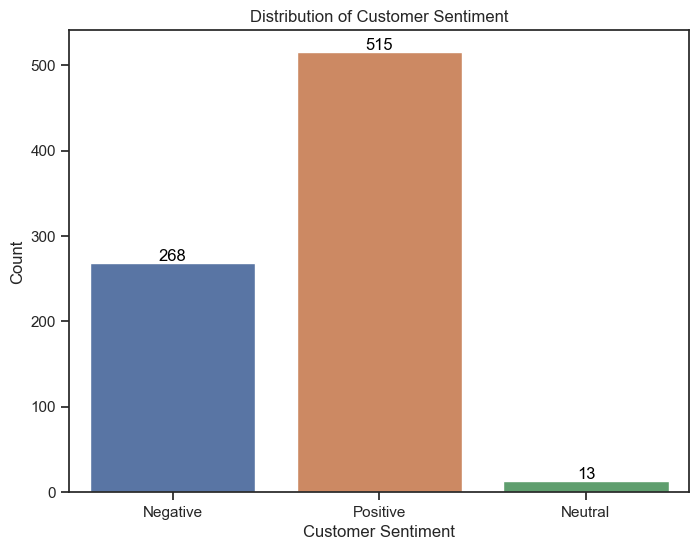

In [13]:
# Create the countplot
sns.set(style="ticks")
plt.figure(figsize=(8, 6)) 
ax = sns.countplot(x='sentiment', data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel("Customer Sentiment")
plt.ylabel("Count")
plt.title("Distribution of Customer Sentiment")
plt.show()

**Insight**

*Out of 796 reviews, 515 were positive, 268 were negative and 13 were neutral. This means the majority of reviews were polarised as either positive or negative*

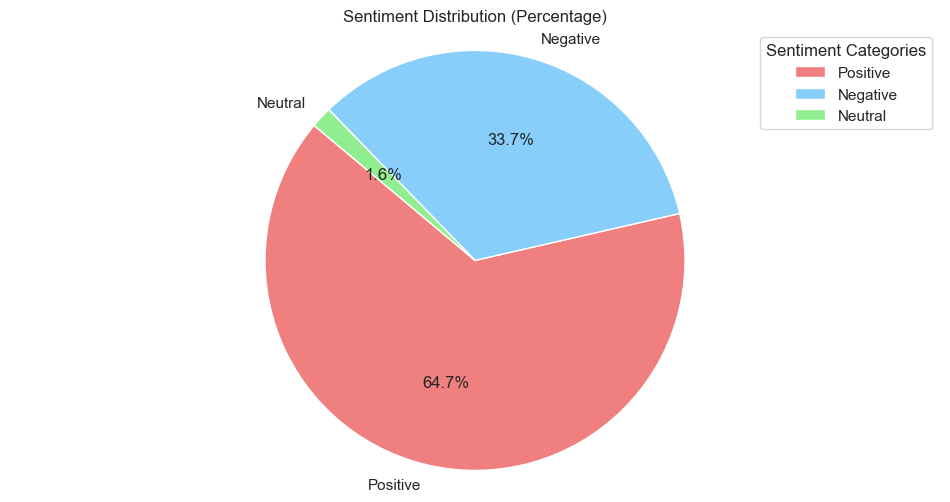

In [15]:
# Count the number of reviews in each sentiment category
sentiment_counts = df['sentiment'].value_counts()
# Calculate the percentage of each sentiment category
total_reviews = len(df)
sentiment_percentages = (sentiment_counts / total_reviews) * 100
# Define custom colors for the pie chart
colors = ['lightcoral', 'lightskyblue', 'lightgreen']
# Plot a pie chart to visualize the sentiment percentages
plt.figure(figsize=(12, 6))
plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sentiment Distribution (Percentage)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Create a legend explaining the colors and sentiment categories
legend_labels = ['Positive', 'Negative', 'Neutral']
plt.legend(legend_labels, title="Sentiment Categories", loc="upper right")
plt.show()

## Wordcloud

c:\Users\HOANG THE KIET\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


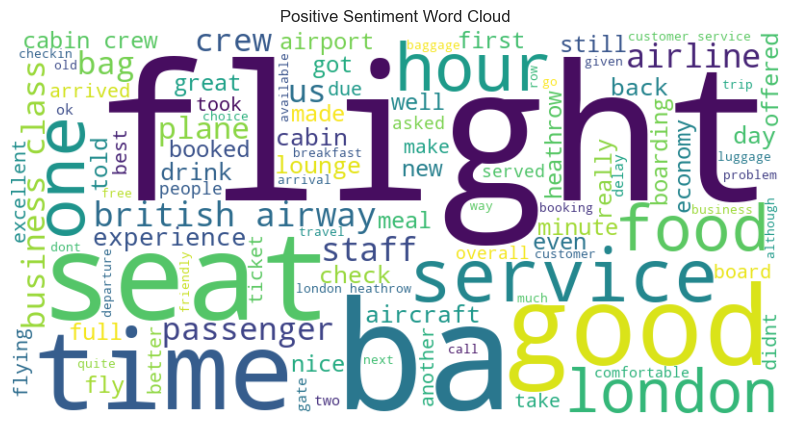

c:\Users\HOANG THE KIET\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


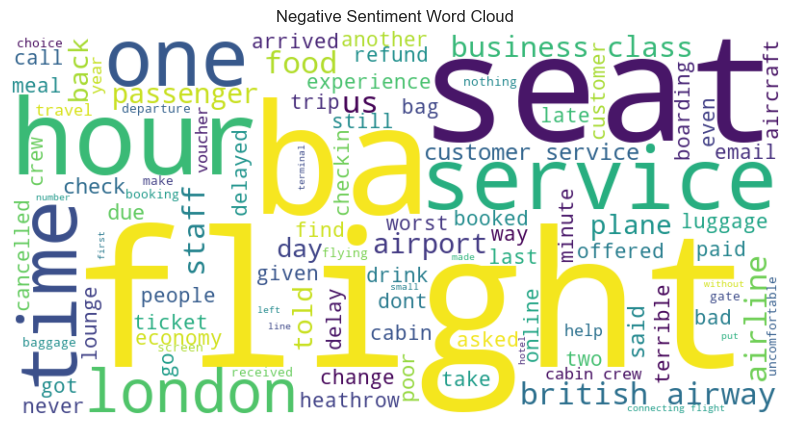

c:\Users\HOANG THE KIET\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


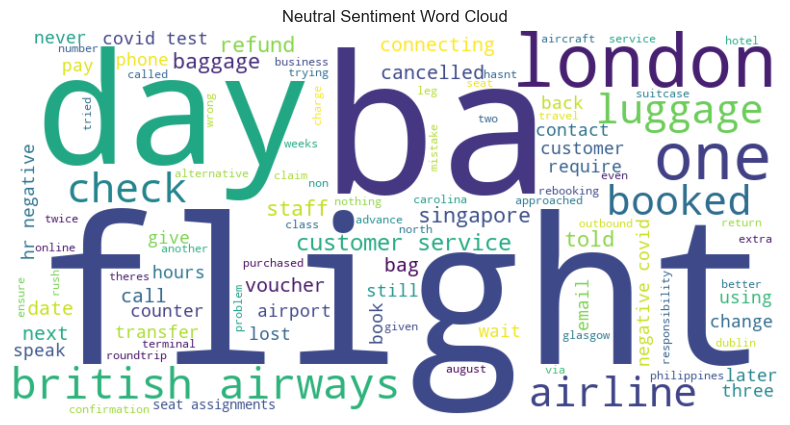

In [ ]:
# Filter data by sentiment
positive_reviews = ' '.join(df[df['sentiment'] == 'Positive']['clean_reviews'])
negative_reviews = ' '.join(df[df['sentiment'] == 'Negative']['clean_reviews'])
neutral_reviews = ' '.join(df[df['sentiment'] == 'Neutral']['clean_reviews'])

# Generate word clouds for each sentiment
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Create word clouds for each sentiment
generate_wordcloud(positive_reviews, 'Positive Sentiment Word Cloud')
generate_wordcloud(negative_reviews, 'Negative Sentiment Word Cloud')
generate_wordcloud(neutral_reviews, 'Neutral Sentiment Word Cloud')

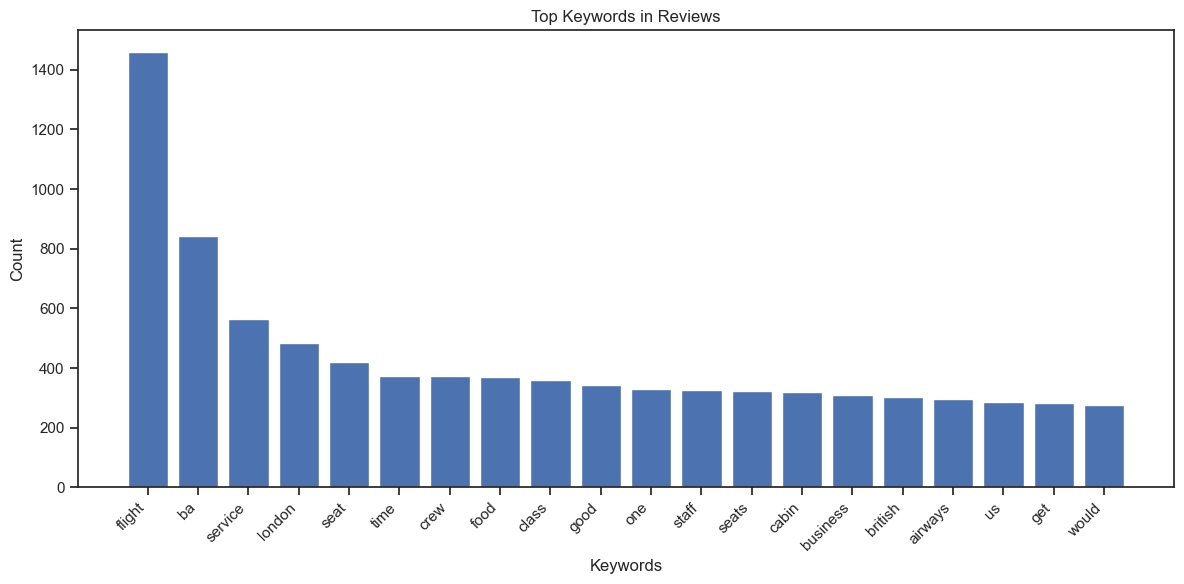

In [ ]:
# Combine all the cleaned reviews into a single text
all_reviews_text = ' '.join(df['clean_reviews'])

# Tokenize the text using CountVectorizer
vectorizer = CountVectorizer(max_features=20) 
X = vectorizer.fit_transform([all_reviews_text])

# Get the most common keywords
keywords = vectorizer.get_feature_names_out()
word_counts = X.toarray()[0]

# Create a DataFrame to store keyword counts
keyword_df = pd.DataFrame({'Keyword': keywords, 'Count': word_counts})

# Sort keywords by count in descending order
keyword_df = keyword_df.sort_values(by='Count', ascending=False)

# Plot the keywords in a bar graph
plt.figure(figsize=(12, 6))
plt.bar(keyword_df['Keyword'], keyword_df['Count'])
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.title('Top Keywords in Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight**

*The frequency chart shows that the key topics within the reviews include “service”, “seat”, “crew” and “staff”, showing that people are actively talking about their experience and staff*